I initially wanted to work with air quality as my metric, but after working with the data set for a bit, I began to realize the information in that data set wasn't separated by neighborhoods, and thus not proper for the analysis I had in mind. I began looking for a different metric instead, and deciding to stick with health related metrics, I chose [Median Age at Death 2011-15 by Neighborhood, City of Pittsburgh](https://data.wprdc.org/dataset/median-age-death/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2) instead. Death can be a result of many things and sometimes these deaths have no stakes whatsoever on the location, but often times they do. Even if this assumption is wrong, a low median death age can bring about a more grim foreboding feeling when living in that neighborhood. Either way, it's somewhat self explanatory how a low median death age qualifies a neighborhood to be one of the worst neighborhoods. Regardless of how long we'd like to personally live, the median death age can be telling about living conditions and the health and/or safety of the environment there for the residents. 

To begin, let's import everything as necessary and read our data file.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('median-death-age.csv')

Taking a look at the data we're working with here in the file, we're given more information than we need to work with. In particular, it shows the median death age of white and black people per neighborgood, but for our needs we're only going to be focusing on the total medians. 

In [69]:
# our data is already organized pretty well for use, 
# so we're going to just sort them by their median age 
sorted_values = data.sort_values("TOTAL MD AGE AT DEATH")

# it looks like there's 2 outliers here, so we're going to 
# manually remove South Shore and Chateau ourselves 
sorted_values = sorted_values.drop(0)
sorted_values = sorted_values.drop(1)

# these aren't actual data entries, so we're going to trim
# the two end rows too 
sorted_values = sorted_values.drop(90) 
sorted_values = sorted_values.drop(91)

# let's take a look at the 10 lowest values now!
print(sorted_values[["NEIGHBORHOOD", "TOTAL MD AGE AT DEATH"]].head(10))



            NEIGHBORHOOD  TOTAL MD AGE AT DEATH
9              FAIRYWOOD                   53.3
7      ARLINGTON HEIGHTS                   63.7
3         ALLEGHENY WEST                   65.0
49        EAST ALLEGHENY                   66.2
42             ALLENTOWN                   66.5
38            MANCHESTER                   67.4
4            SAINT CLAIR                   67.5
22     NORTHVIEW HEIGHTS                   68.0
14  CALIFORNIA-KIRKBRIDE                   69.3
17                 BLUFF                   70.0


It looks like Fairywood has the lowest median age of death by quite a bit, but to get a better understanding of this data, let's make a visualization of it.

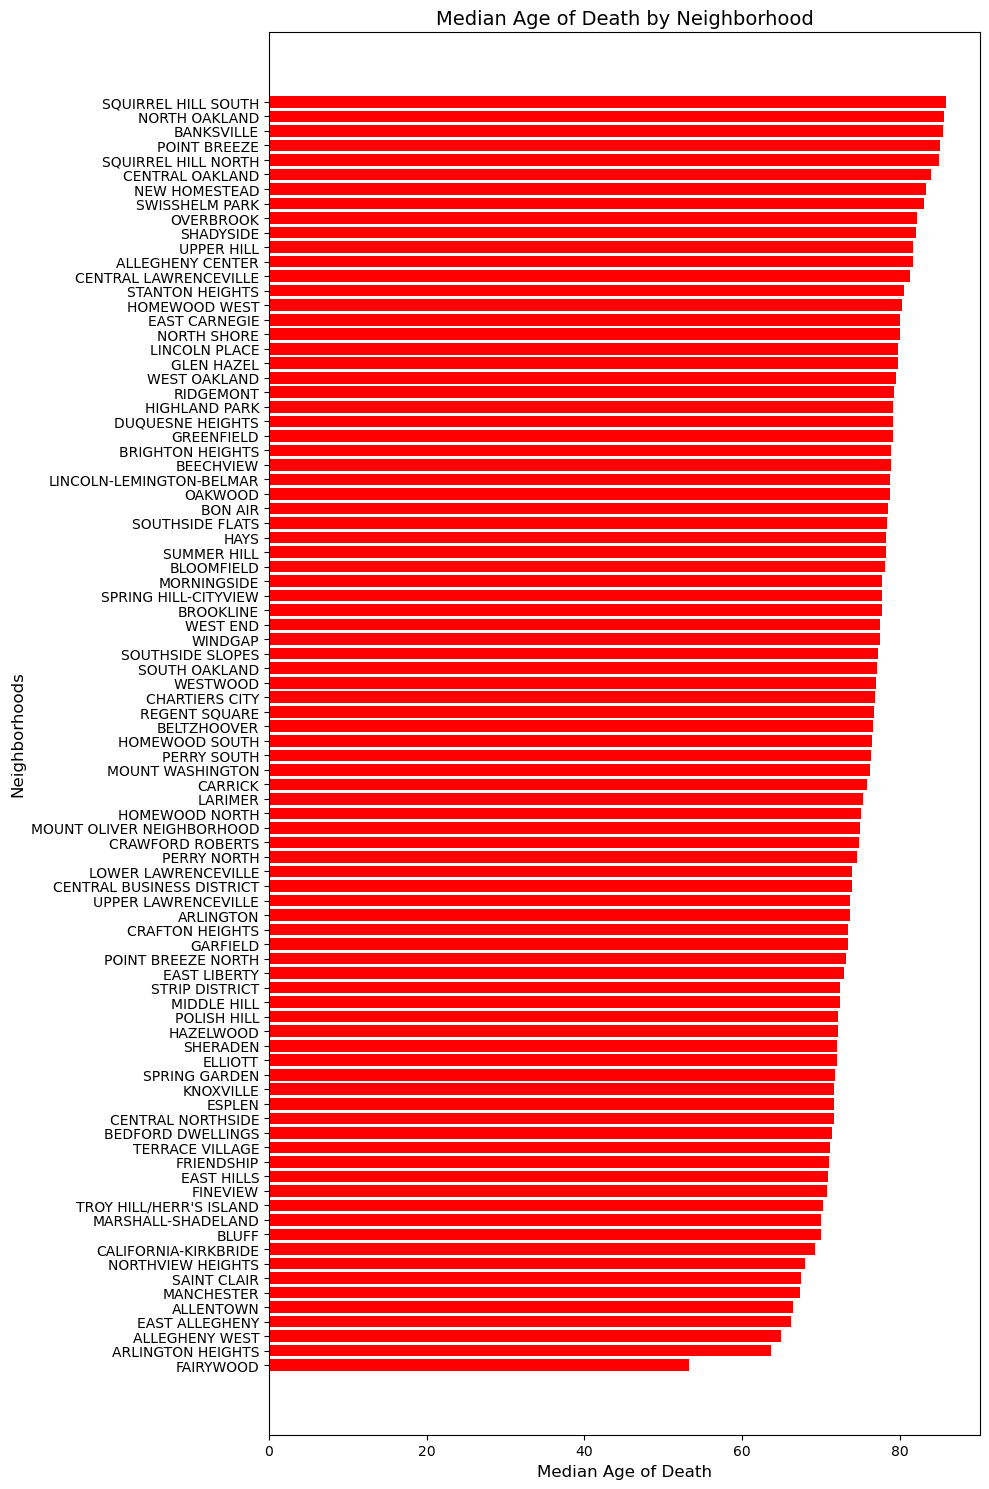

In [34]:
plt.figure(figsize=(10, 15))
plt.barh(sorted_values['NEIGHBORHOOD'], sorted_values['TOTAL MD AGE AT DEATH'], color='r')
plt.xlabel('Median Age of Death', fontsize=12)
plt.ylabel('Neighborhoods', fontsize=12)
plt.title('Median Age of Death by Neighborhood', fontsize=14)
plt.tight_layout()
plt.show()

*That's a pretty big graph.* The main takeaway we can deduce from it is that Fairywood's median age of death is fairly smaller than the rest of the neighborhoods in Pittsburgh by quite the fair amount. We can see that Squirrel Hill South, the neighborhood with the highest median age of death, is the start of a steady decline across the neighborhoods that only really drops off with Fairywood at the very end. 

Also judging from this graph, the average median age of death definitely seems to be between 60 and 80, whereas Fairywood's median age of death is below that. To be certain, we can calculate the mean for ourselves via the data. 

In [40]:
avg = sorted_values['TOTAL MD AGE AT DEATH'].mean() 

print(f"The average median age of death in Pittsburgh is {avg:.2f}.")

The average median age of death in Pittsburgh is 75.70.


*Wow,* that's actually a higher average than I thought. As we've already figured out, Fairywood's median age of death is 53.3 which is 22.4 years below average for Pittsburgh. The runner up for the lowest median age of death (Arlington Heights) has a difference of only 12, which is nearly half of Fairywood's deficit. 

It should be clear from here that Fairywood has the lowest median age of death in Pittsburgh, likely due to certain conditions in the area, which makes it the worst neighborhood in terms of livability, if you're looking to live a long or healthy life.